目前使用LOP為定義之實驗數據採用34筆，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
# os.getcwd()

In [3]:
datafile = u"/root/LR_ML/FinalData00.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0).drop(['No pulse', 'LOP error'],axis=1)

In [5]:
# TIP.head()

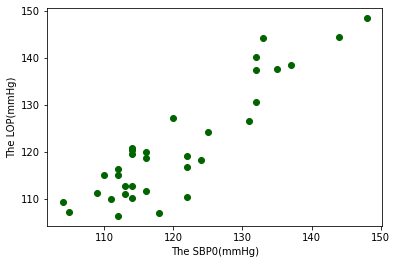

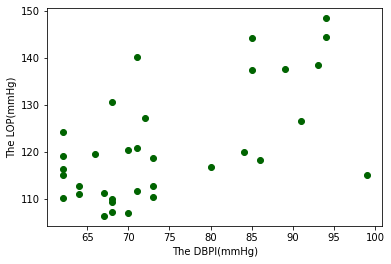

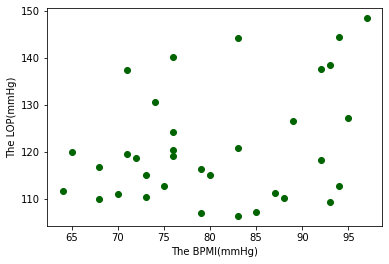

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBP0(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.DBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The DBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.BPM0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The BPMI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBP0       DBP0       BPM0         LOP
count   34.000000  34.000000  34.000000   34.000000
mean   120.470588  74.529412  80.411765  121.179412
std     10.935722  11.152484   9.680088   12.128049
min    104.000000  62.000000  64.000000  106.400000
25%    113.000000  67.000000  73.000000  111.350000
50%    116.000000  71.000000  79.000000  118.400000
75%    129.500000  84.750000  88.750000  127.125000
max    148.000000  99.000000  97.000000  148.400000
          SBP0      DBP0      BPM0       LOP
SBP0  1.000000  0.624775  0.308419  0.900879
DBP0  0.624775  1.000000  0.375735  0.606758
BPM0  0.308419  0.375735  1.000000  0.317790
LOP   0.900879  0.606758  0.317790  1.000000


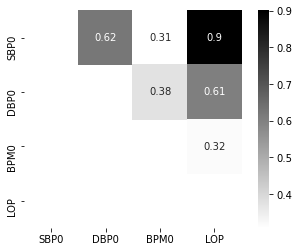

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)

matrix = np.tril(rDf)
H = sns.heatmap(modTIP.corr(),annot=True, cmap="gray_r", square=True, mask=matrix)
F = H.get_figure()
# F.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBP0, modTIP.LOP))

print(t_test(modTIP.DBP0, modTIP.LOP))

print(t_test(modTIP.BPM0, modTIP.LOP))

print(t_test(modTIP.LOP, modTIP.LOP))

(-0.2530945133333057, 0.8009818540065048)
(-16.509436323154176, 4.008545107875963e-25)
(-15.319077271038518, 2.0433360472356635e-23)
(0.0, 1.0)


MAE: 3.896560091301351
最佳擬合線: LOP =  [3.89] + [0.97] * SBP0
R squared: 0.7854261363636352
MAE: 5.594974099135091
最佳擬合線: LOP =  [-1.51] + [1.02] * SBP0
R squared: -0.29530303030303084
MAE: 4.939589319235337
最佳擬合線: LOP =  [1.36] + [0.99] * SBP0
R squared: 0.5682066938037093
MAE: 3.3635198499531134
最佳擬合線: LOP =  [-0.91] + [1.02] * SBP0
R squared: 0.8874563106796117
MAE: 4.0317174045092345
最佳擬合線: LOP =  [2.13] + [0.99] * SBP0
R squared: 0.9053639240506328
5-fold Mean MAE: 4.365272152826825


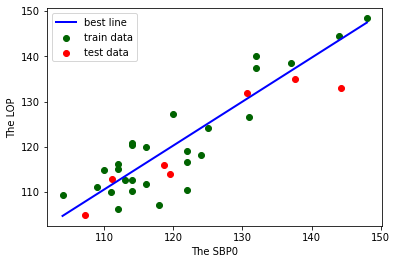

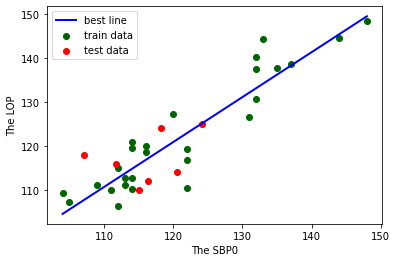

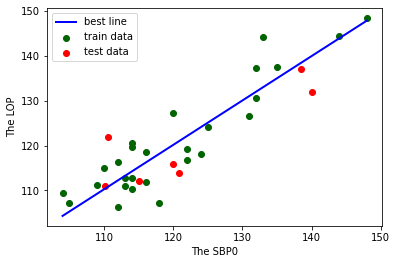

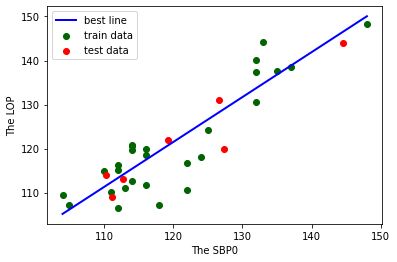

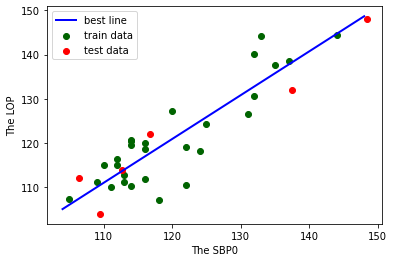

In [33]:
XX=modTIP.SBP0
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (34,1))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (34,1))
# cross_val_score(model, qqq, qqqq, cv=2)
# lr=LinearRegression()

# predicted = cross_val_predict(lr, qqq, qqqq, cv=5)
# fig, ax = plt.subplots()
# ax.scatter(qqqq, predicted)
# ax.plot([qqqq.min(), qqqq.max()], [qqqq.min(), qqqq.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
# seed = 7
kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    print("MAE:",mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    plt.figure()
    a=lrr.intercept_
    b=lrr.coef_
    X1=np.linspace(qqq.min(),qqq.max(),52)
    Y1=np.round(a,2) + np.round(b[0],2) * X1
    print("最佳擬合線: LOP = ",np.round(a,2),"+",np.round(b[0],2),"* SBP0")
    plt.plot(X1, Y1, color='blue', linewidth=2, label="best line")
    plt.scatter(qqq[train], qqqq[train], color='darkgreen', label="train data")
    plt.scatter(qqqq[validate], qqq[validate], color='red', label="test data")
    plt.legend(loc=2)
    plt.xlabel("The SBP0")
    plt.ylabel("The LOP")
    print("R squared:",lrr.score(qqqq[validate],lrr.predict(qqq[validate])))#噴三個 R score
print("5-fold Mean MAE:",np.mean(s))#mse mean
# scoring = 'neg_mean_absolute_error'
# results = model_selection.cross_val_score(lrr, qqq, qqqq, cv=kfold, scoring=scoring)
# print("負的MAE",results.mean())

In [11]:
# print(predicted)

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


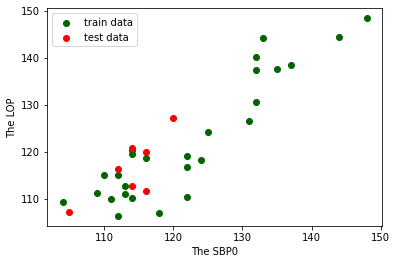

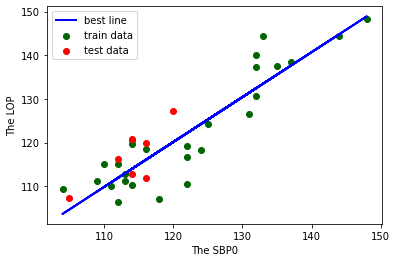

擬合參數:截距 -3.314270606263321 ,迴歸係數： [1.02861028]
最佳擬合線: LOP =  -3.31 + 1.03 * SBP0
0.8251795391990294
4.357306887099903


In [32]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBP0,modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBP0.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (27,1))#reshape換成(28,1)
qq = np.array(X_test)
qq = np.reshape(qq, (7,1))
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train = model.predict(q)#看原本線性
y_train_pred = model.predict(qq)#預測y
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(q, y_train, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBP0")
#顯示線性方程，並限制參數的小數位爲兩位
print(model.score(q,Y_train))#R score
print(mean_absolute_error(Y_test,y_train_pred))

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


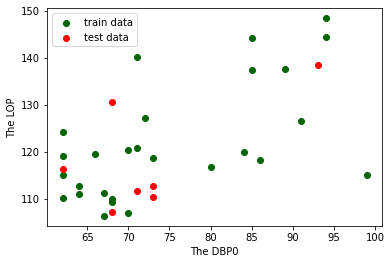

In [13]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.DBP0,modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.DBP0.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The DBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


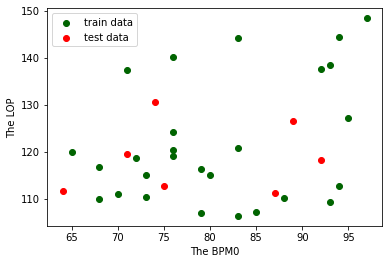

In [14]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.BPM0,modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.BPM0.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The BPM0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

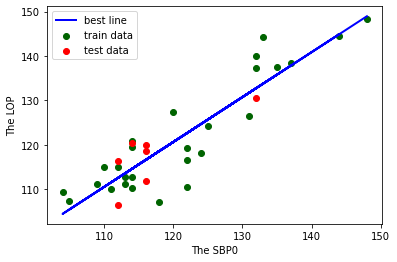

擬合參數:截距 -0.6251718877348509 ,迴歸係數： [1.01061002]
最佳擬合線: LOP =  -0.63 + 1.01 * SBP0
0.821812958819426
4.026484294999057
